In [48]:
import numpy
import scipy
import netCDF4
import matplotlib.pyplot as mp
import matplotlib.ticker
import matplotlib.colors
import scipy.stats
import pandas
import itertools

mp.rcParams.update({'mathtext.default': 'regular'})
% matplotlib inline

In [49]:
working_dir = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/'
#save_dir = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/calculations/npy_files/'
#latlon_indices = numpy.load(working_dir + 'ccal_latlon_indices_array.npy'); region='ccal'
#latlon_indices = numpy.load(working_dir + 'ncal_latlon_indices_array.npy'); region='ncal'
#latlon_indices = numpy.load(working_dir + 'scal_latlon_indices_array.npy'); region='scal'

PRECT_lat = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lat.npy')
PRECT_lon = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lon.npy')

In [50]:
working_dir = '/Users/baird/google_drive/_data_original/NCAR_LENS/daily/PRECT/calculated_npy_files/'
#threshold=0.0
threshold=0.1
#threshold=0.5
#threshold=1.0
#threshold=5.0
#threshold=10.0

In [51]:
PRECT_nlat = 26
PRECT_nlon = 25

latlon_indices = list(itertools.product(range(PRECT_nlat), range(PRECT_nlon)))
region = 'whole_domain'
window=1

# Open preindustrial control info

In [52]:
year_start_pic = 402 #time_subsets[chunk,0]
year_end_pic = 2200 #time_subsets[chunk,1]

year_start = 1920
year_end = 2100

# create season strings
years_pic = numpy.arange(year_start_pic, year_end_pic+1, 1).astype(numpy.int)
half_years_pic = numpy.arange(year_start_pic+0.75, year_end_pic, 1)
#season_strings_pic = numpy.empty(years.size-1, dtype=numpy.str)

season_strings_pic = [str(years_pic[i])+'-'+str(years_pic[i+1]) for i in range(years_pic.size-1)]
member_strings_pic = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_pic=year_end_pic-year_start_pic

In [34]:
latlon_idx = 4
filename = 'member_005_latidx_'+'{:02d}'.format(latlon_indices[latlon_idx][0])+'_lonidx_'+'{:02d}'.format(latlon_indices[latlon_idx][1])+'_years_'+'{:04d}'.format(year_start_pic)+'-'+'{:04d}'.format(year_end_pic)+'_threshold_'+str(threshold)+'mmday_'+region+'.npy'
print(filename)
working_dir = '/Users/baird/Dropbox/_data_original/NCAR_LENS/daily/PRECT/calculated_npy_files/whole_domain/'

dict_pic = numpy.load(working_dir + filename).item()

member_005_latidx_00_lonidx_04_years_0402-2200_threshold_0.1mmday_whole_domain.npy


In [35]:
print(dict_pic['466-467'].keys())
#sum_40d_list = dict_region['402-403']['running_40d_sum']

# flatten all values
#sum_40d_list = [dict_region[i]['running_40d_sum'] for i in dict_region.keys()]
#sum_40d_array = numpy.array([item for sublist in sum_40d_list for item in sublist])

# just keep one 40d period
#sum_40d_list = [dict_region[i]['running_40d_sum'][149] for i in dict_region.keys()]
#sum_40d_array = numpy.array(sum_40d_list)

# store every 40d period in a separate place
sum_40d_list = [dict_pic[i]['running_40d_sum'] for i in dict_region.keys()]
store_all_distros = numpy.zeros((151-40, n_seasons_pic))
for yr in range(len(season_strings_pic)):
    for d40_idx in range(151-40):
        store_all_distros[d40_idx, yr] = numpy.array([dict_pic[season_strings_pic[yr]]['running_40d_sum'][d40_idx]])

#print(store_all_distros.shape)
#print(len(sum_40d_list[0]))
sum_40d_array = numpy.array([item for sublist in sum_40d_list for item in sublist])

dict_keys(['storm_count', 'storm_magnitude_list', 'storm_length_list', 'seasonal_total', 'running_40d_sum', 'monthly_totals'])


In [36]:
sum_40d_array = sum_40d_array[~numpy.isnan(sum_40d_array)]

In [37]:
#bins = numpy.linspace(sum_40d_array.min(), sum_40d_array.max(), 500)
bins = numpy.arange(sum_40d_array.min(), sum_40d_array.max()+1, 1)
hist_count, bin_edges = numpy.histogram(sum_40d_array, bins=bins, density=False)
hist, bin_edges = numpy.histogram(sum_40d_array, bins=bins, density=True)

In [38]:
bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
bin_width = numpy.diff(bin_edges)

In [39]:
sum_40d_array.size/1798
perc = 1.0/(sum_40d_array.size/1798 * 200)
print(perc)
perc_hi = scipy.stats.scoreatpercentile(sum_40d_array, per=99.5)
print(numpy.percentile(sum_40d_array, 55.6))
#print(scipy.stats.percentileatscore(sum_40d_array, score=))
9*111/1798

4.464307883302296e-05
50.2494368365


0.5556173526140156

In [40]:
cumul_dist = numpy.cumsum(hist)

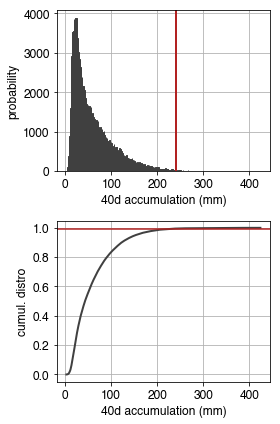

In [41]:
fontsize=12

fig = mp.figure(figsize=(4,6))

ax1 = fig.add_subplot(211)
ax1.bar(bin_centers, hist_count, align='center', width=bin_width, color='0.25', edgecolor='0.25', label='PIC')
ax1.axvline(perc_hi, c='firebrick', lw=2)
ax1.tick_params(labelsize=fontsize)
ax1.set_ylabel('probability', fontsize=fontsize)
ax1.set_xlabel('40d accumulation (mm)', fontsize=fontsize)
ax1.grid()
ax1.set_axisbelow(True)

ax2 = fig.add_subplot(212)
ax2.plot(bin_centers, cumul_dist, c='0.25', lw=2)
ax2.axhline(.995, c='firebrick')
ax2.tick_params(labelsize=fontsize)
ax2.set_ylabel('cumul. distro', fontsize=fontsize)
ax2.set_xlabel('40d accumulation (mm)', fontsize=fontsize)
ax2.grid()
ax2.set_axisbelow(True)


fig.tight_layout()

# Open hist and RCP8.5 info

In [42]:
year_start_hist = 1920 #time_subsets[chunk,0]
year_end_hist = 2010 #time_subsets[chunk,1]

# create season strings
years = numpy.arange(year_start_hist, year_end_hist+1, 1).astype(numpy.int)
half_years_hist = numpy.arange(year_start_hist+0.75, year_end_hist, 1)

season_strings_hist = [str(years[i])+'-'+str(years[i+1]) for i in range(years.size-1)]
member_strings_hist = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_hist=year_end_hist-year_start_hist

In [43]:
year_start_rcp = 1920
year_end_rcp = 2100

# create season strings
years = numpy.arange(year_start_rcp, year_end_rcp+1, 1).astype(numpy.int)
half_years_rcp = numpy.arange(year_start_rcp+0.75, year_end_rcp, 1)

season_strings_rcp = [str(years[i])+'-'+str(years[i+1]) for i in range(years.size-1)]
member_strings_rcp = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_rcp=year_end_rcp-year_start_rcp

In [44]:
ensemble_members = numpy.hstack((numpy.arange(1,36), numpy.arange(101,106)))
ensemble_names = ['{:03d}'.format(i) for i in ensemble_members]
print(ensemble_names)

['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '101', '102', '103', '104', '105']


In [45]:
working_dir = '/Users/baird/Dropbox/_data_original/NCAR_LENS/daily/PRECT/calculated_npy_files/whole_domain/'

dict_list_hist_rcp = []
for i in range(len(ensemble_names)):
    ensemble_member=ensemble_names[i]
    filename = 'member_'+ensemble_member+'_latidx_'+'{:02d}'.format(latlon_indices[latlon_idx][0])+'_lonidx_'+'{:02d}'.format(latlon_indices[latlon_idx][1])+'_years_'+'{:04d}'.format(year_start)+'-'+'{:04d}'.format(year_end)+'_threshold_'+str(threshold)+'mmday_'+region+'.npy'
    dict_list_hist_rcp.append(numpy.load(working_dir + filename).item())

# Import seasonal accumulation data

In [46]:
#dict_hist_rcp = dict_OD_list_hist_rcp; dict_pic = dict_OD; location='OD'
#dict_hist_rcp = dict_SF_list_hist_rcp; dict_pic = dict_SF; location='SF'
dict_hist_rcp = dict_list_hist_rcp

seasonal_total_list_hist = []
for i in range(len(ensemble_names)):
    seasonal_total = [dict_hist_rcp[i][s]['seasonal_total'] for s in season_strings_hist]
    #seasonal_total = numpy.array([item for sublist in seasonal_total for item in sublist])  
    seasonal_total_list_hist.append(seasonal_total)
seasonal_total_hist = numpy.array([item for sublist in seasonal_total_list_hist for item in sublist])

seasonal_total_list_rcp = []
for i in range(len(ensemble_names)):
    seasonal_total = [dict_hist_rcp[i][s]['seasonal_total'] for s in season_strings_rcp]
    #seasonal_total = numpy.array([item for sublist in seasonal_total for item in sublist])  
    seasonal_total_list_rcp.append(seasonal_total)
seasonal_total_rcp = numpy.array([item for sublist in seasonal_total_list_rcp for item in sublist])

seasonal_total_pic = numpy.array([dict_pic[s]['seasonal_total'] for s in season_strings_pic])
#seasonal_total_pic = numpy.array([item for sublist in seasonal_total_pic for item in sublist])

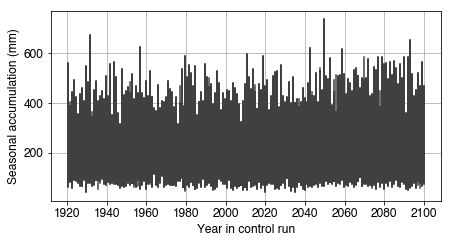

In [47]:
# now count the number of events that happen in the RCP data set
# for each season, count number of events gte the value in the pic

fontsize=12

seasonal_total_allseasons = []
for s in range(len(season_strings_rcp)):
    seasonal_total = [dict_hist_rcp[i][season_strings_rcp[s]]['seasonal_total'] for i in range(len(ensemble_names))]
    #seasonal_total = [item for sublist in seasonal_total for item in sublist]
    seasonal_total_allseasons.append(seasonal_total)

fig = mp.figure(figsize=(7,3.5))
ax = fig.add_subplot(111)
for t in range(half_years_rcp.size):
    ax.plot([half_years_rcp[t]]*len(seasonal_total_allseasons[t]), seasonal_total_allseasons[t], color='0.25')

ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Year in control run', fontsize=fontsize)
ax.set_ylabel('Seasonal accumulation (mm)', fontsize=fontsize)
#ax.set_xticks(numpy.arange(400,2201,300))#[400,500,750,1000,1250,1500,1750,2000,2200])
#ax.set_yticks([0,250,500,750,1000,1250,1500])
#ax.set_xlim(300,2300)
ax.set_xticks(numpy.arange(1920,2101,20))

ax.grid()
ax.set_axisbelow(True)

# Set up whiplash calculation information

In [ ]:
# get top and bottom 10th percentiles in PIC
# then see how often it transitions from 1 or 2 seasons with that

lo_perc = 20
hi_perc = 80
pic_hi = numpy.percentile(seasonal_total_pic, hi_perc)
window=3

# take 3 year running mean for pic_lo
seasonal_total_pic_3yr_mean = numpy.array(pandas.Series(seasonal_total_pic).rolling(window=window).mean())
pic_lo = numpy.nanpercentile(seasonal_total_pic_3yr_mean, lo_perc)

whiplash_count_pic = 0
whiplash_hi_seasons = []
whiplash_lo_seasons = []
lo_count = 0

s=0
# check and see if the 3 year running mean is less than the necessary low
# if so, consider it a low count
# and then ask if the NEXT season is above the hi perc
# if so
while s<seasonal_total_pic.size:
    if (seasonal_total_pic_3yr_mean[s]<pic_lo):
        lo_count+=1
        s+=1
    elif (seasonal_total_pic[s]>pic_hi)&(lo_count>0):
        whiplash_count_pic+=1
        whiplash_hi_seasons.append(s)
        whiplash_lo_seasons.append(s-1)
        lo_count=0
        s+=window-1
    else:
        lo_count=0
        s+=1
#print(whiplash_lo_seasons)
"""
s=0
while s<seasonal_total_pic.size:
    if (seasonal_total_pic[s]<pic_lo):
        lo_count += 1
        s+=1
    elif (seasonal_total_pic[s]>pic_hi)&(lo_count>(n_lo_events-1)):
        whiplash_count_pic += 1
        whiplash_hi_seasons.append(s)
        whiplash_lo_seasons.append([i for i in range((s-n_lo_events),(s))])
        lo_count = 0
        s+=1
    else:
        s+=1
        lo_count=0
"""

#flatten this list
#whiplash_lo_seasons = [item for sublist in whiplash_lo_seasons for item in sublist]
whiplash_lo_seasons = [item for item in whiplash_lo_seasons]

In [ ]:
# now count the number of events that happen in the RCP data set
# for each season, count number of events gte the value in the pic

fontsize=12

fig = mp.figure(figsize=(7,3))
ax = fig.add_subplot(111)

ax.plot(half_years_pic, seasonal_total_pic, color='0.4', zorder=1)

ax.scatter(half_years_pic[whiplash_hi_seasons], seasonal_total_pic[whiplash_hi_seasons], marker='s', c='dodgerblue', s=25, zorder=2)
ax.scatter(half_years_pic[whiplash_lo_seasons], seasonal_total_pic_3yr_mean[whiplash_lo_seasons], marker='s', c='firebrick', s=25, zorder=2)
#ax.plot(half_years_pic, seasonal_total_pic_3yr_mean, color='darkcyan', zorder=10)

ax.tick_params(labelsize=fontsize)
ax.set_xticks([400,600,800,1000,1200,1400,1600,1800,2000,2200])
#ax.set_xlabel('Year in control run', fontsize=fontsize)
ax.set_ylabel('Seasonal accumulation (mm)', fontsize=fontsize)
ax.set_xlabel('Year in preindustrial control', fontsize=fontsize)

ax.axhline(pic_hi, lw=2, zorder=1, color='dodgerblue')
ax.axhline(pic_lo, lw=2, zorder=1, color='firebrick')

ax.text(s='whiplash count: '+str(whiplash_count_pic)+\
        '\nlow percentile: '+str(lo_perc)+\
        '%\nhigh percentile: '+str(hi_perc)+'%', x=1.02, y=1.0, ha='left', va='top', fontsize=fontsize, transform=ax.transAxes, zorder=1)

ax.axhspan(pic_lo, pic_hi, color='0.75', zorder=0)
ax.grid()
ax.set_axisbelow(True)

#mp.savefig('./figs/all_preindustrial_seasonal_accumulations_threshold_WHIPLASH_'+str(threshold)+'_mmday_loperc_'+'{:.0f}'.format(lo_perc)+'_hiperc_'+'{:.0f}'.format(hi_perc)+'_dryseasons_'+str(n_lo_events)+'_'+location+'.pdf', transparent=True, bbox_inches='tight')

In [ ]:
print(whiplash_lo_seasons)

In [ ]:
# import all rcp data NOT BUNCHED TOGETHER but separately as each ensemble member
seasonal_total_separate_ensembles = []

year_start_whiplash = 1920
year_end_whiplash = 2100

# calculate index
year_start_index = 180 - (2100 - year_start_whiplash)
year_end_index = 180 - (2100 - year_end_whiplash)

for i in range(len(ensemble_names)):
    seasonal_total = [dict_hist_rcp[i][s]['seasonal_total'] for s in season_strings_rcp[year_start_index:year_end_index]]
    #seasonal_total = [item for sublist in seasonal_total for item in sublist]
    seasonal_total_separate_ensembles.append(numpy.array(seasonal_total))

In [ ]:
# now calculate 3 yr running mean for each ensemble member
seasonal_total_separate_ensembles_3yr_mean = []
for data in seasonal_total_separate_ensembles:
    seasonal_total_separate_ensembles_3yr_mean.append( numpy.array( pandas.Series(data).rolling(window=window).mean() ))

In [ ]:
# get top and bottom 10th percentiles in PIC
# then see how often it transitions from 1 or 2 seasons with that

whiplash_count = 0
whiplash_hi_seasons = []
whiplash_lo_seasons = []
lo_count = 0
whiplash_lo_seasons_ens = []
whiplash_hi_seasons_ens = []

for i in range(len(ensemble_names)):
    s=0
    while s<len(season_strings_rcp[year_start_index:year_end_index]):
        if (seasonal_total_separate_ensembles_3yr_mean[i][s]<pic_lo):
            lo_count += 1
            s+=1
        elif (seasonal_total_separate_ensembles[i][s]>pic_hi)&(lo_count>0):
            whiplash_count += 1
            whiplash_hi_seasons.append(s)
            whiplash_lo_seasons.append(s-1)
            lo_count = 0
            s+=window-1
        else:
            s+=1
            lo_count=0

    whiplash_lo_seasons = [item for item in whiplash_lo_seasons]
    whiplash_lo_seasons_ens.append(whiplash_lo_seasons)
    whiplash_hi_seasons_ens.append(whiplash_hi_seasons)
    
    whiplash_hi_seasons = []
    whiplash_lo_seasons = []

#whiplash_lo_seasons_ens = [item for sublist in whiplash_lo_seasons_ens for item in sublist]

#print(whiplash_lo_seasons_ens[0])
#print(whiplash_hi_seasons_ens[0])

#print(len(whiplash_hi_seasons_ens))
#print(len(whiplash_lo_seasons_ens))

In [ ]:
# now count the number of events that happen in the RCP data set
# for each season, count number of events gte the value in the pic

fontsize=12

fig = mp.figure(figsize=(12,10))

total_whiplash_count = 0

for i in range(len(ensemble_names)):
    
    ax = fig.add_subplot(8,5,i+1)
    ax.plot(half_years_rcp[year_start_index:year_end_index], seasonal_total_separate_ensembles[i], color='0.4', zorder=2)

    ax.grid()
    ax.tick_params(labelsize=fontsize)
    ax.set_axisbelow(True)
    ax.set_ylim(-200,1700)
    ax.set_yticks([0,500,1000,1500])
    ax.set_xlim(year_start_whiplash-10, year_end_whiplash+10)#(1900,2120)
    #ax.set_xticks([1920,1980,2040,2100])
    
    ax.text(s=ensemble_names[i], x=0.03, y=0.95, fontsize=fontsize, ha='left', va='top', transform=ax.transAxes, color='firebrick', zorder=1)
    ax.text(s='count: '+str(len(whiplash_hi_seasons_ens[i])), fontsize=fontsize, ha='right', va='top', x=0.97, y=0.97, transform=ax.transAxes, color='dodgerblue', zorder=1)
    total_whiplash_count += len(whiplash_hi_seasons_ens[i])
    
    ax.scatter(half_years_rcp[year_start_index:year_end_index][whiplash_hi_seasons_ens[i]], seasonal_total_separate_ensembles[i][whiplash_hi_seasons_ens[i]], marker='s', c='dodgerblue', s=10, zorder=3)
    ax.scatter(half_years_rcp[year_start_index:year_end_index][whiplash_lo_seasons_ens[i]], seasonal_total_separate_ensembles_3yr_mean[i][whiplash_lo_seasons_ens[i]], marker='s', c='firebrick', s=10, zorder=3)

    ax.axhspan(pic_lo, pic_hi, color='0.75', zorder=0)
    
    if i in [0,5,10,15,20,25,30]:
        ax.xaxis.set_ticklabels([])
        ax.tick_params('x', length=0)
        #ax.xaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
    elif i in [36,37,38,39]:
        ax.yaxis.set_ticklabels([])
        ax.tick_params('y', length=0)
    elif i==35:
        pass
    else:
        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        ax.tick_params('x', length=0)
        ax.tick_params('y', length=0)
    
fig.text(s='Year in historical + RCP8.5 runs', x=0.5, y=-0.005, fontsize=fontsize, ha='center', va='top')
fig.text(s='Seasonal accumulation (mm)', x=-0.005, y=0.5, fontsize=fontsize, ha='right', va='center', rotation=90)
fig.text(s='Total whiplash count:  '+str(total_whiplash_count), x=0.5, y=1.005, fontsize=fontsize, ha='center', va='bottom')

fig.tight_layout(w_pad=0, h_pad=0)


"""


ax.scatter(half_years_pic[whiplash_hi_seasons], seasonal_total_pic[whiplash_hi_seasons], marker='s', c='dodgerblue', s=25, zorder=2)
ax.scatter(half_years_pic[whiplash_lo_seasons], seasonal_total_pic[whiplash_lo_seasons], marker='s', c='firebrick', s=25, zorder=2)

ax.tick_params(labelsize=fontsize)
#ax.set_xlabel('Year in control run', fontsize=fontsize)
ax.set_ylabel('Seasonal accumulation (mm)', fontsize=fontsize)
ax.set_xlabel('Year in preindustrial control', fontsize=fontsize)

ax.axhline(pic_hi, lw=2, zorder=1, color='dodgerblue')
ax.axhline(pic_lo, lw=2, zorder=1, color='firebrick')

ax.text(s='whiplash count: '+str(whiplash_count)+\
        '\nlow percentile: '+str(lo_perc)+\
        '%\nhigh percentile: '+str(hi_perc)+'%'+\
        '\nlow seasons:  '+str(n_low_events), x=0.97, y=0.95, ha='right', va='top', fontsize=fontsize, transform=ax.transAxes)
"""

#fig.savefig('./figs/all_hist_rcp_seasonal_accumulations_threshold_WHIPLASH_'+str(threshold)+'_mmday_loperc_'+'{:.0f}'.format(lo_perc)+'_hiperc_'+'{:.0f}'.format(hi_perc)+'_dryseasons_'+str(n_lo_events)+'_'+location+'.pdf', transparent=True, bbox_inches='tight')

In [ ]:
# times per century for PREINDUSTRIAL whiplash event
pic_freq = (whiplash_count_pic/1798)*100

# times per century for RCP8.5-like warming
rcp_freq = (total_whiplash_count/(len(ensemble_names)*(2100-1920)))*100

print(pic_freq, rcp_freq)
rcp_freq/pic_freq

# Now do these counts for only the time period of interest

In [ ]:
# import all rcp data NOT BUNCHED TOGETHER but separately as each ensemble member
seasonal_total_separate_ensembles = []

year_start_whiplash = 2070
year_end_whiplash = 2100

# calculate index
year_start_index = 180 - (2100 - year_start_whiplash)
year_end_index = 180 - (2100 - year_end_whiplash)

for i in range(len(ensemble_names)):
    seasonal_total = [dict_hist_rcp[i][s]['seasonal_total'] for s in season_strings_rcp[year_start_index:year_end_index]]
    #seasonal_total = [item for sublist in seasonal_total for item in sublist]
    seasonal_total_separate_ensembles.append(numpy.array(seasonal_total))

In [ ]:
# now calculate 3 yr running mean for each ensemble member
seasonal_total_separate_ensembles_3yr_mean = []
for data in seasonal_total_separate_ensembles:
    seasonal_total_separate_ensembles_3yr_mean.append( numpy.array( pandas.Series(data).rolling(window=window).mean() ))

In [ ]:
# get top and bottom 10th percentiles in PIC
# then see how often it transitions from 1 or 2 seasons with that

whiplash_count = 0
whiplash_hi_seasons = []
whiplash_lo_seasons = []
lo_count = 0
whiplash_lo_seasons_ens = []
whiplash_hi_seasons_ens = []

for i in range(len(ensemble_names)):
    s=0
    while s<len(season_strings_rcp[year_start_index:year_end_index]):
        if (seasonal_total_separate_ensembles_3yr_mean[i][s]<pic_lo):
            lo_count += 1
            s+=1
        elif (seasonal_total_separate_ensembles[i][s]>pic_hi)&(lo_count>0):
            whiplash_count += 1
            whiplash_hi_seasons.append(s)
            whiplash_lo_seasons.append(s-1)
            lo_count = 0
            s+=window-1
        else:
            s+=1
            lo_count=0

    whiplash_lo_seasons = [item for item in whiplash_lo_seasons]
    whiplash_lo_seasons_ens.append(whiplash_lo_seasons)
    whiplash_hi_seasons_ens.append(whiplash_hi_seasons)
    
    whiplash_hi_seasons = []
    whiplash_lo_seasons = []

#whiplash_lo_seasons_ens = [item for sublist in whiplash_lo_seasons_ens for item in sublist]

#print(whiplash_lo_seasons_ens[0])
#print(whiplash_hi_seasons_ens[0])

#print(len(whiplash_hi_seasons_ens))
#print(len(whiplash_lo_seasons_ens))

In [ ]:
# now count the number of events that happen in the RCP data set
# for each season, count number of events gte the value in the pic

fontsize=12

fig = mp.figure(figsize=(12,10))

total_whiplash_count = 0

for i in range(len(ensemble_names)):
    
    ax = fig.add_subplot(8,5,i+1)
    ax.plot(half_years_rcp[year_start_index:year_end_index], seasonal_total_separate_ensembles[i], color='0.4', zorder=2)

    ax.grid()
    ax.tick_params(labelsize=fontsize)
    ax.set_axisbelow(True)
    ax.set_ylim(-200,1700)
    ax.set_yticks([0,500,1000,1500])
    ax.set_xlim(year_start_whiplash-5, year_end_whiplash+5)#(1900,2120)
    #ax.set_xticks([1920,1980,2040,2100])
    
    ax.text(s=ensemble_names[i], x=0.03, y=0.95, fontsize=fontsize, ha='left', va='top', transform=ax.transAxes, color='firebrick', zorder=1)
    ax.text(s='count: '+str(len(whiplash_hi_seasons_ens[i])), fontsize=fontsize, ha='right', va='top', x=0.97, y=0.97, transform=ax.transAxes, color='dodgerblue', zorder=1)
    total_whiplash_count += len(whiplash_hi_seasons_ens[i])
    
    ax.scatter(half_years_rcp[year_start_index:year_end_index][whiplash_hi_seasons_ens[i]], seasonal_total_separate_ensembles[i][whiplash_hi_seasons_ens[i]], marker='s', c='dodgerblue', s=10, zorder=3)
    ax.scatter(half_years_rcp[year_start_index:year_end_index][whiplash_lo_seasons_ens[i]], seasonal_total_separate_ensembles_3yr_mean[i][whiplash_lo_seasons_ens[i]], marker='s', c='firebrick', s=10, zorder=3)

    ax.axhspan(pic_lo, pic_hi, color='0.75', zorder=0)
    
    if i in [0,5,10,15,20,25,30]:
        ax.xaxis.set_ticklabels([])
        ax.tick_params('x', length=0)
        #ax.xaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
    elif i in [36,37,38,39]:
        ax.yaxis.set_ticklabels([])
        ax.tick_params('y', length=0)
    elif i==35:
        pass
    else:
        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        ax.tick_params('x', length=0)
        ax.tick_params('y', length=0)
    
fig.text(s='Year in historical + RCP8.5 runs', x=0.5, y=-0.005, fontsize=fontsize, ha='center', va='top')
fig.text(s='Seasonal accumulation (mm)', x=-0.005, y=0.5, fontsize=fontsize, ha='right', va='center', rotation=90)
fig.text(s='Total whiplash count:  '+str(total_whiplash_count), x=0.5, y=1.005, fontsize=fontsize, ha='center', va='bottom')

fig.tight_layout(w_pad=0, h_pad=0)


"""


ax.scatter(half_years_pic[whiplash_hi_seasons], seasonal_total_pic[whiplash_hi_seasons], marker='s', c='dodgerblue', s=25, zorder=2)
ax.scatter(half_years_pic[whiplash_lo_seasons], seasonal_total_pic[whiplash_lo_seasons], marker='s', c='firebrick', s=25, zorder=2)

ax.tick_params(labelsize=fontsize)
#ax.set_xlabel('Year in control run', fontsize=fontsize)
ax.set_ylabel('Seasonal accumulation (mm)', fontsize=fontsize)
ax.set_xlabel('Year in preindustrial control', fontsize=fontsize)

ax.axhline(pic_hi, lw=2, zorder=1, color='dodgerblue')
ax.axhline(pic_lo, lw=2, zorder=1, color='firebrick')

ax.text(s='whiplash count: '+str(whiplash_count)+\
        '\nlow percentile: '+str(lo_perc)+\
        '%\nhigh percentile: '+str(hi_perc)+'%'+\
        '\nlow seasons:  '+str(n_low_events), x=0.97, y=0.95, ha='right', va='top', fontsize=fontsize, transform=ax.transAxes)
"""

#fig.savefig('./figs/all_hist_rcp_seasonal_accumulations_threshold_WHIPLASH_'+str(threshold)+'_mmday_loperc_'+'{:.0f}'.format(lo_perc)+'_hiperc_'+'{:.0f}'.format(hi_perc)+'_dryseasons_'+str(n_lo_events)+'_'+location+'.pdf', transparent=True, bbox_inches='tight')

In [ ]:
# times per century for PREINDUSTRIAL whiplash event
pic_freq = (whiplash_count_pic/1798)*100

# times per century for RCP8.5-like warming
rcp_freq = (total_whiplash_count/(len(ensemble_names)*(year_end_whiplash-year_start_whiplash)))*100

print(pic_freq, rcp_freq)
rcp_freq/pic_freq